In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in the data set.

In [4]:
df.shape

(614, 13)

Removing these null values from the data may have a huge percentage data loss as the size of data set is small.

Instead we will fill those null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
len(df['Loan_ID'].unique())

614

The loan _id is just an identification number
we can remove that column

In [8]:
df.drop(columns=['Loan_ID'],inplace = True)

In [10]:
df.shape

(614, 12)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [13]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

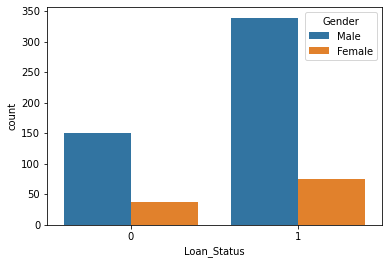

In [14]:
sns.countplot(df['Loan_Status'],hue = df['Gender'])

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

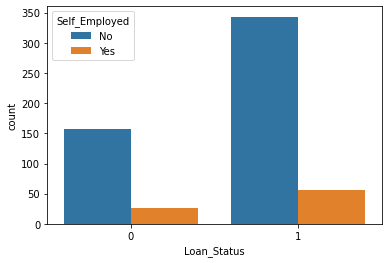

In [15]:
sns.countplot(df['Loan_Status'],hue = df['Self_Employed'])

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [18]:
for i in df.columns:
    print(i, df[i].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
ApplicantIncome [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281

Applicant income, coapplicant income and loan amount and loan term the only continous data columns available in the dataset.

Every other column is a categorical data. Lets encode them

In [19]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
cat_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [23]:
df.fillna(method='bfill',inplace=True)

In [24]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All null values has been filled by backward fill method

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [26]:
for i in cat_col:
    print(i, df[i].unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']


Gender married education and self employed can be done by label encoder for 0 and 1 values

In [27]:
df['Gender'] = le.fit_transform(df['Gender'])

In [28]:
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [30]:
copy = df.copy()
for i in ('Dependents','Property_Area'):
    dum = pd.get_dummies(df[i])
    copy = pd.concat([copy,dum],axis=1)

In [31]:
copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,1,0,0,0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,1,0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,0,0,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,0,0,0,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,1,0,0,0,0,0,1


In [32]:
copy.drop(columns=['Dependents','Property_Area'],inplace = True)

In [33]:
copy.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

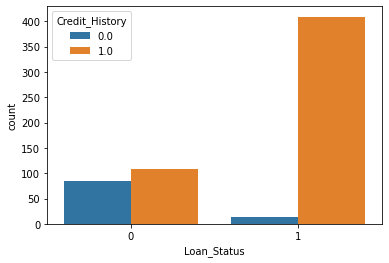

In [36]:
sns.countplot(df['Loan_Status'],hue=df['Credit_History'])

We can notice that mostly, loan is approved for previous credit history available users.

Though, it is not approved for some.

<AxesSubplot:>

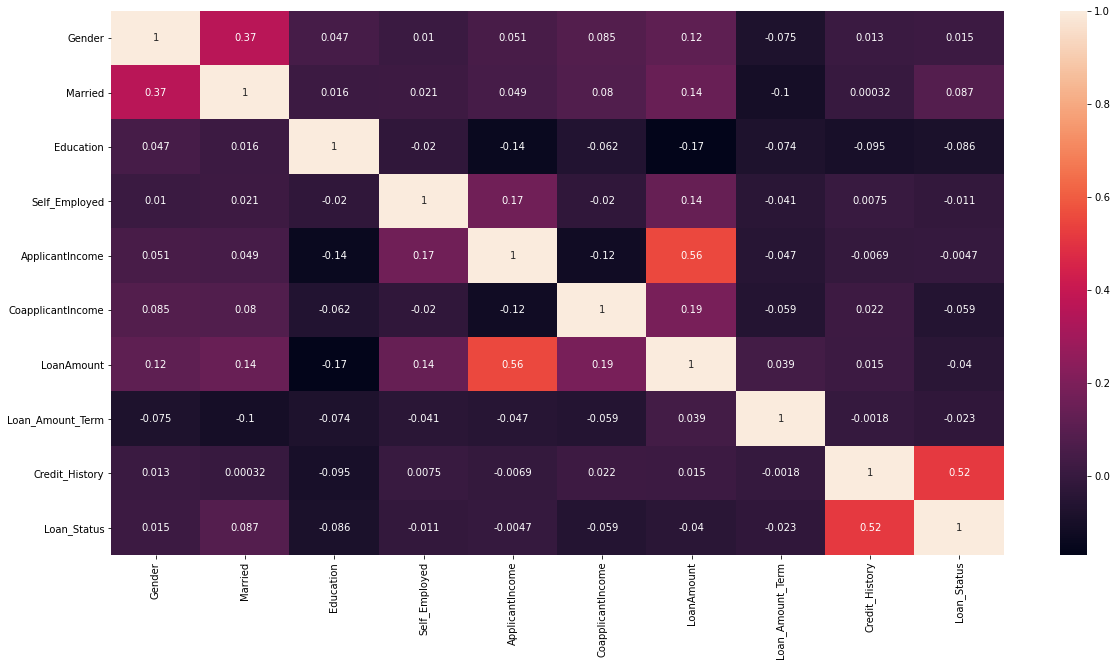

In [38]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)

There isnt any noticebale correlation between columns

But, applicant income and credit amount show a positive correlation.

More the income, More the credit amount

The categorical columns have been encoded

Lets see about the continous data columns such as income and credit

In [39]:
con_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

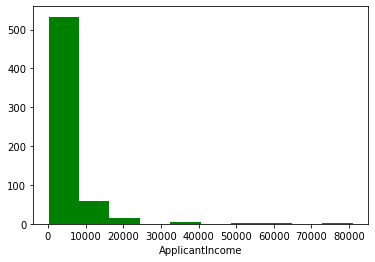

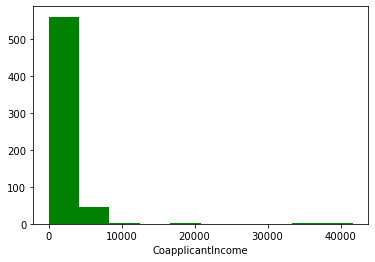

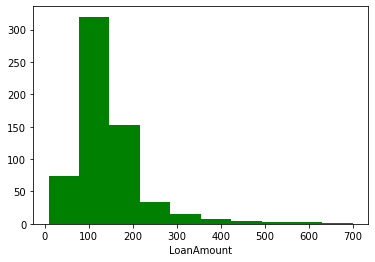

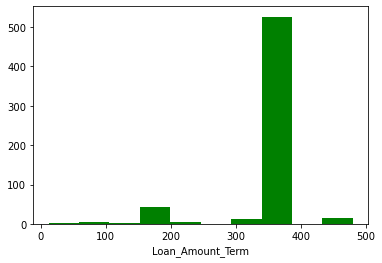

In [42]:
for i in con_col:
    plt.subplots()
    plt.hist(copy[i],color='g')
    plt.xlabel(i)

Loan_Amount_Term is left skewed and remaining columns are rigth skewed

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\si

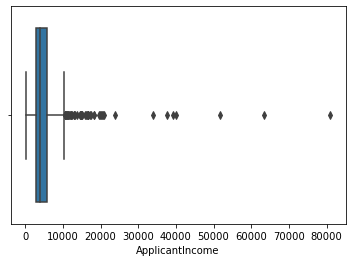

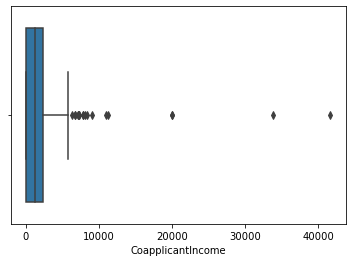

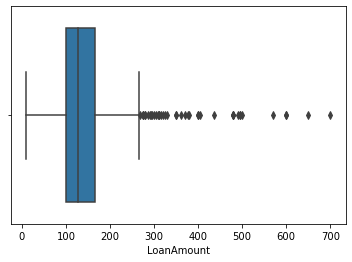

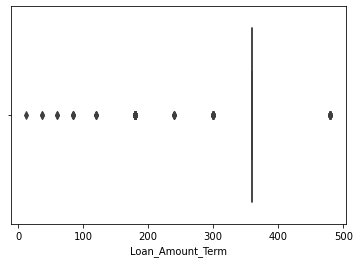

In [45]:
for i in con_col:
    plt.subplots()
    sns.boxplot(copy[i])
    plt.xlabel(i)

There are many outliers, as the amount of data is low, we cant remove the outliers, lets try to remove its skewness

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

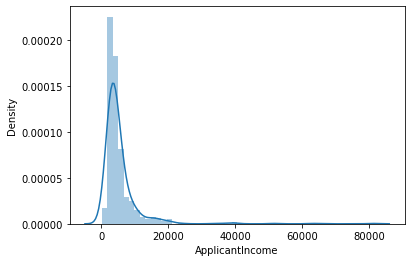

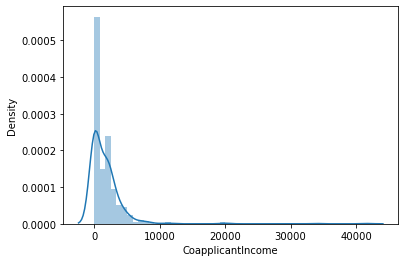

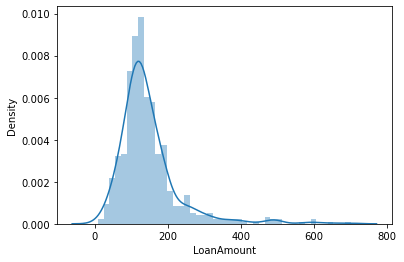

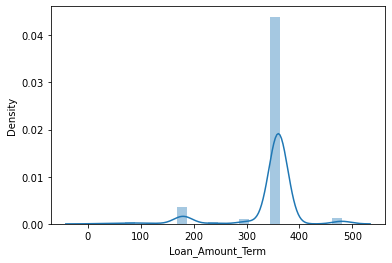

In [46]:
for i in con_col:
    plt.subplots()
    sns.distplot(copy[i])
    plt.xlabel(i)

In [47]:
for i in con_col:
    print(i,copy[i].skew())

ApplicantIncome 6.539513113994625
CoapplicantIncome 7.491531216657306
LoanAmount 2.681925797877669
Loan_Amount_Term -2.4021122563890396


In [48]:
for i in con_col:
    print(i,copy[i].min())

ApplicantIncome 150
CoapplicantIncome 0.0
LoanAmount 9.0
Loan_Amount_Term 12.0


coapplicant income has value 0 in it, we cant use log transformation for that.

In [49]:
for i in con_col:
    if i != 'CoapplicantIncome' :
        print(i, np.log(copy[i]).skew())
    else:
        pass

ApplicantIncome 0.4795799780016222
LoanAmount -0.19554524405245902
Loan_Amount_Term -4.8690200943444975


Lets check with sqrt and cbrt

In [50]:
for i in con_col:
    print(i, np.sqrt(copy[i]).skew())

ApplicantIncome 2.9672860248621027
CoapplicantIncome 0.9795605436152078
LoanAmount 1.3055913183806047
Loan_Amount_Term -3.181940428569826


In [51]:
for i in con_col:
    print(i, np.cbrt(copy[i]).skew())

ApplicantIncome 2.083638232551192
CoapplicantIncome 0.19672586559954766
LoanAmount 0.8363141662152669
Loan_Amount_Term -3.578100328047661


In [52]:
copy['ApplicantIncome'] = np.log(copy['ApplicantIncome'])

In [53]:
copy['CoapplicantIncome'] = np.cbrt(copy['CoapplicantIncome'])
copy['LoanAmount'] = np.log(copy['LoanAmount'])

copy['Loan_Amount_Term'] = np.sqrt(copy['Loan_Amount_Term'])

Which transformation gives best results have been used for that columns

This is a classification problem.

In [55]:
X = copy.drop(columns=['Loan_Status'])
X.shape

(614, 16)

In [56]:
Y = copy['Loan_Status']
Y.shape

(614,)

The data has been split into target and predictor variables

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [58]:
scaledX = scaler.fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(scaledX,Y,test_size=0.3)

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(xtrain,ytrain)

predlr = lr.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(ytest,predlr))
print(confusion_matrix(ytest,predlr))
print(classification_report(ytest,predlr))

0.8054054054054054
[[ 26  33]
 [  3 123]]
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        59
           1       0.79      0.98      0.87       126

    accuracy                           0.81       185
   macro avg       0.84      0.71      0.73       185
weighted avg       0.82      0.81      0.78       185



The accuracy for logistsic regression is 80%

In [62]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(xtrain,ytrain)

preddt = dtc.predict(xtest)

print(accuracy_score(ytest,preddt))
print(confusion_matrix(ytest,preddt))
print(classification_report(ytest,preddt))

0.7027027027027027
[[33 26]
 [29 97]]
              precision    recall  f1-score   support

           0       0.53      0.56      0.55        59
           1       0.79      0.77      0.78       126

    accuracy                           0.70       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.71      0.70      0.70       185



The accuracy for decision tree is 70%

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)

predrf = rf.predict(xtest)

print(accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

0.7783783783783784
[[ 28  31]
 [ 10 116]]
              precision    recall  f1-score   support

           0       0.74      0.47      0.58        59
           1       0.79      0.92      0.85       126

    accuracy                           0.78       185
   macro avg       0.76      0.70      0.71       185
weighted avg       0.77      0.78      0.76       185



In [66]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(xtrain,ytrain)

predsv = sv.predict(xtest)

print(accuracy_score(ytest,predsv))
print(confusion_matrix(ytest,predsv))
print(classification_report(ytest,predsv))

0.7945945945945946
[[ 24  35]
 [  3 123]]
              precision    recall  f1-score   support

           0       0.89      0.41      0.56        59
           1       0.78      0.98      0.87       126

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.77       185



the accuracy for random forest is 77%

the accuracy for suppoprt vecrtor is 79%

In [68]:
from sklearn.model_selection import cross_val_score

cvs1 = cross_val_score(lr,xtest,ytest,cv=5)
print('lr',cvs1.mean())

cvs2 = cross_val_score(dtc,xtest,ytest,cv=5)
print('dtc',cvs2.mean())

cvs3 = cross_val_score(rf,xtest,ytest,cv=5)
print('rf',cvs3.mean())

cvs4 = cross_val_score(sv,xtest,ytest,cv=5)
print('svc',cvs4.mean())


lr 0.7945945945945946
dtc 0.7351351351351352
rf 0.7837837837837839
svc 0.8


In [69]:
0.8054054054054054 - 0.7945945945945946

0.010810810810810811

In [70]:
0.7027027027027027 - 0.7351351351351352

-0.032432432432432434

In [71]:
0.7783783783783784 - 0.7837837837837839

-0.005405405405405461

In [72]:
0.7945945945945946 - 0.8

-0.005405405405405461

The support vector and random forest has the same minimal difference

since, the sv has high accuracy than rf.

Lets proceed with tuning parameters for sv

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

gcv = GridSearchCV(sv,param_grid, cv=5)

gcv.fit(xtrain,ytrain)

pred = gcv.predict(xtest)

print(accuracy_score(ytest,pred))

print(gcv.best_params_)

0.8054054054054054
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [75]:
sv_mod = SVC( C = 1000, gamma = 0.001, kernel = 'rbf')

sv_mod.fit(xtrain,ytrain)

preds = sv_mod.predict(xtest)

print(accuracy_score(ytest,preds))

0.8054054054054054


The accuracy we reached is 80.5% after tuning the hyper paramter

Text(0, 0.5, 'True Positive Rate')

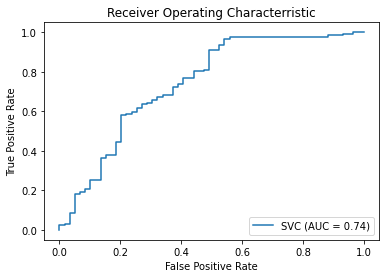

In [76]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(sv_mod,xtest,ytest)
plt.title("Receiver Operating Characterristic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


Classifiers that give curves closer to the top-left corner indicate a better performance.

Hence, The randomf forest classifier is giving the better performance.

the AUC performs well as a general measure of predictive accuracy.

Area under the curve is 74% indicating that the model is performing better with accuracy 74%

In [77]:
import pickle

filename = 'Loan_Status.pkl'

pickle.dump(sv_mod,open(filename,'wb'))